# Required Libraries and Setup
Import necessary libraries including NLTK, scikit-learn, matplotlib, seaborn, and ipywidgets for interactive features.

In [ ]:
# Import necessary libraries
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import ipywidgets as widgets

# Download necessary NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# N-gram Generator Implementation
Create custom functions to generate n-grams from text input, supporting both word and character level n-grams.

In [2]:
from typing import List

def generate_word_ngrams(text: str, n: int) -> List[str]:
    """Generate word-level n-grams from the given text."""
    words = nltk.word_tokenize(text)
    ngrams = nltk.ngrams(words, n)
    return [' '.join(gram) for gram in ngrams]

def generate_char_ngrams(text: str, n: int) -> List[str]:
    """Generate character-level n-grams from the given text."""
    ngrams = nltk.ngrams(text, n)
    return [''.join(gram) for gram in ngrams]

# Example usage
text = "The quick brown fox jumps over the lazy dog"
print("Word-level bigrams:", generate_word_ngrams(text, 2))
print("Character-level trigrams:", generate_char_ngrams(text, 3))

Word-level bigrams: ['The quick', 'quick brown', 'brown fox', 'fox jumps', 'jumps over', 'over the', 'the lazy', 'lazy dog']
Character-level trigrams: ['The', 'he ', 'e q', ' qu', 'qui', 'uic', 'ick', 'ck ', 'k b', ' br', 'bro', 'row', 'own', 'wn ', 'n f', ' fo', 'fox', 'ox ', 'x j', ' ju', 'jum', 'ump', 'mps', 'ps ', 's o', ' ov', 'ove', 'ver', 'er ', 'r t', ' th', 'the', 'he ', 'e l', ' la', 'laz', 'azy', 'zy ', 'y d', ' do', 'dog']


# Text Preprocessing Functions
Implement text cleaning, tokenization, and normalization functions to prepare text for n-gram analysis.

In [ ]:
# Text Preprocessing Functions

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
# nltk.download('stopwords')
# nltk.download('wordnet')

def clean_text(text: str) -> str:
    """Clean the input text by removing special characters and extra spaces."""
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

def tokenize_text(text: str) -> List[str]:
    """Tokenize the input text into words."""
    return nltk.word_tokenize(text)

def remove_stopwords(tokens: List[str]) -> List[str]:
    """Remove stopwords from the list of tokens."""
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

def lemmatize_tokens(tokens: List[str]) -> List[str]:
    """Lemmatize the list of tokens."""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

# Example usage
text = "The quick brown fox jumps over the lazy dog! Isn't it amazing?"
cleaned_text = clean_text(text)
print("Cleaned Text:", cleaned_text)

tokens = tokenize_text(cleaned_text)
print("Tokens:", tokens)

tokens_no_stopwords = remove_stopwords(tokens)
print("Tokens without Stopwords:", tokens_no_stopwords)

lemmatized_tokens = lemmatize_tokens(tokens_no_stopwords)
print("Lemmatized Tokens:", lemmatized_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Omar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaned Text: The quick brown fox jumps over the lazy dog Isnt it amazing
Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', 'Isnt', 'it', 'amazing']
Tokens without Stopwords: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', 'Isnt', 'amazing']
Lemmatized Tokens: ['quick', 'brown', 'fox', 'jump', 'lazy', 'dog', 'Isnt', 'amazing']


# Basic N-gram Analysis
Demonstrate unigram, bigram, and trigram generation with example texts and frequency calculations.

Unigrams: ['The', 'The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Bigrams: ['The The', 'The quick', 'quick brown', 'brown fox', 'fox jumps', 'jumps over', 'over the', 'the lazy', 'lazy dog']
Trigrams: ['The The quick', 'The quick brown', 'quick brown fox', 'brown fox jumps', 'fox jumps over', 'jumps over the', 'over the lazy', 'the lazy dog']
Unigram Frequencies: {'The': 2, 'quick': 1, 'brown': 1, 'fox': 1, 'jumps': 1, 'over': 1, 'the': 1, 'lazy': 1, 'dog': 1}
Bigram Frequencies: {'The The': 1, 'The quick': 1, 'quick brown': 1, 'brown fox': 1, 'fox jumps': 1, 'jumps over': 1, 'over the': 1, 'the lazy': 1, 'lazy dog': 1}
Trigram Frequencies: {'The The quick': 1, 'The quick brown': 1, 'quick brown fox': 1, 'brown fox jumps': 1, 'fox jumps over': 1, 'jumps over the': 1, 'over the lazy': 1, 'the lazy dog': 1}


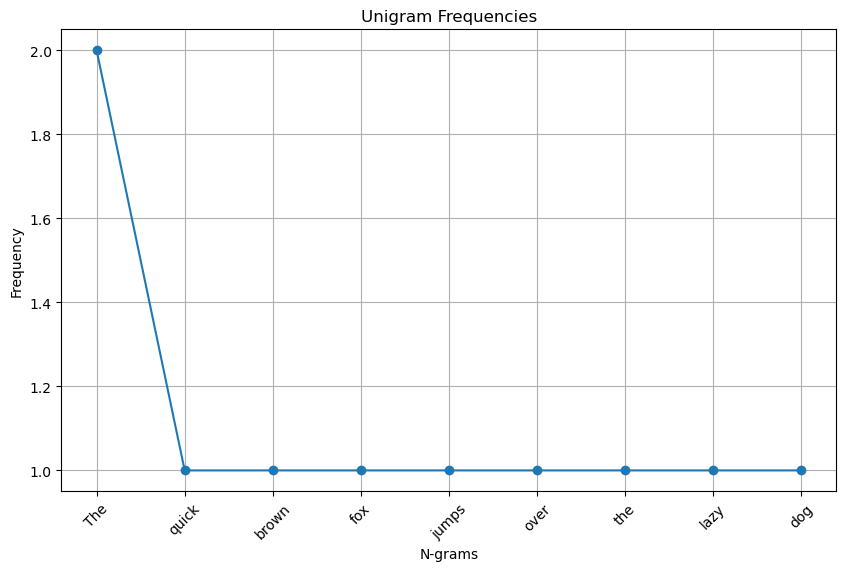

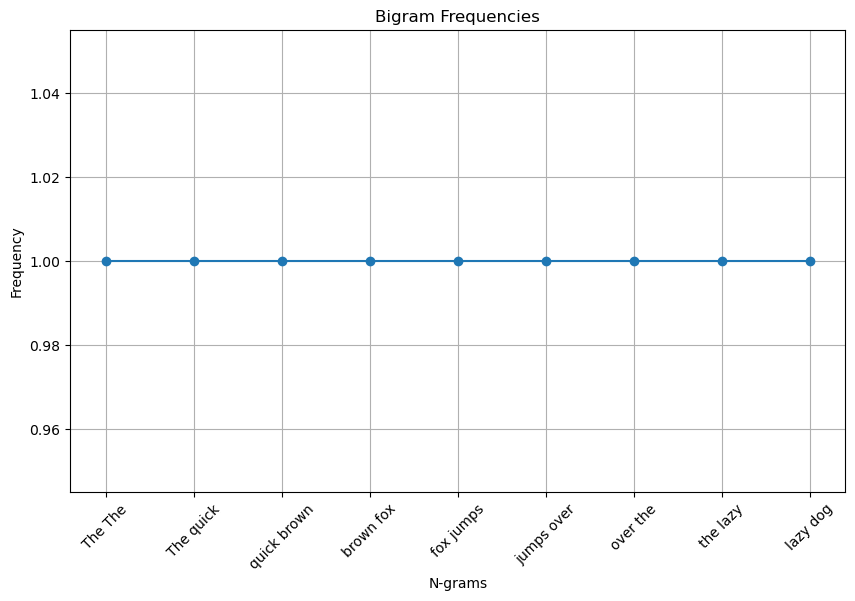

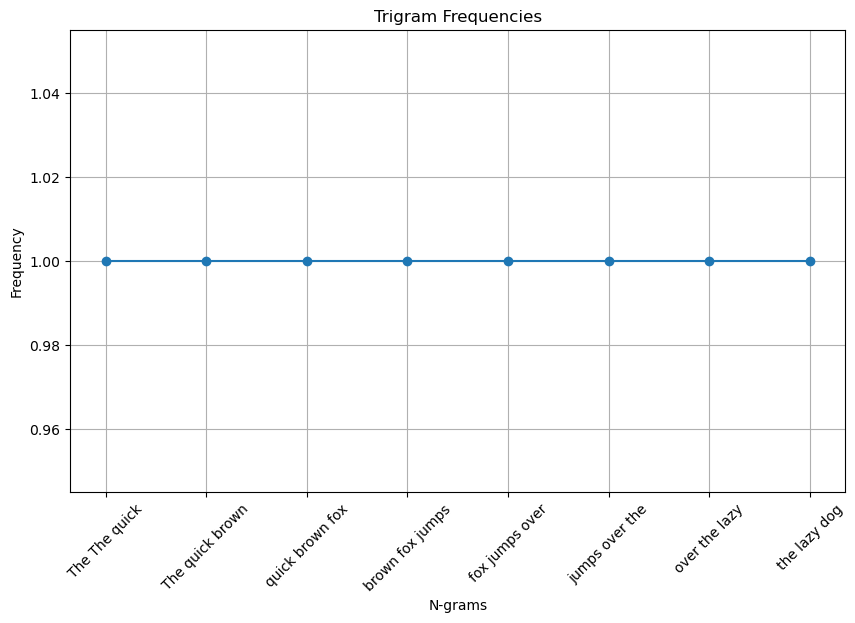

In [8]:
# Basic N-gram Analysis

# Example text
example_text = "The The quick brown fox jumps over the lazy dog"

# Generate unigrams, bigrams, and trigrams
unigrams = generate_word_ngrams(example_text, 1)
bigrams = generate_word_ngrams(example_text, 2)
trigrams = generate_word_ngrams(example_text, 3)

print("Unigrams:", unigrams)
print("Bigrams:", bigrams)
print("Trigrams:", trigrams)

# Calculate frequency of n-grams
def calculate_ngram_frequencies(ngrams: List[str]) -> dict:
    """Calculate the frequency of each n-gram in the list."""
    freq_dict = {}
    for ngram in ngrams:
        if ngram in freq_dict:
            freq_dict[ngram] += 1
        else:
            freq_dict[ngram] = 1
    return freq_dict

# Calculate frequencies for unigrams, bigrams, and trigrams
unigram_freq = calculate_ngram_frequencies(unigrams)
bigram_freq = calculate_ngram_frequencies(bigrams)
trigram_freq = calculate_ngram_frequencies(trigrams)

print("Unigram Frequencies:", unigram_freq)
print("Bigram Frequencies:", bigram_freq)
print("Trigram Frequencies:", trigram_freq)
# Visualize the frequencies using line charts
def plot_ngram_frequencies(freq_dict: dict, title: str):
    """Plot the frequencies of n-grams using a line chart."""
    ngrams = list(freq_dict.keys())
    frequencies = list(freq_dict.values())
    
    plt.figure(figsize=(10, 6))
    plt.plot(ngrams, frequencies, marker='o')
    plt.title(title)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plot unigram, bigram, and trigram frequencies
plot_ngram_frequencies(unigram_freq, "Unigram Frequencies")
plot_ngram_frequencies(bigram_freq, "Bigram Frequencies")
plot_ngram_frequencies(trigram_freq, "Trigram Frequencies")

# Advanced N-gram Processing
Implement probability calculations, handle edge cases, and create n-gram based prediction models.

In [10]:
# Advanced N-gram Processing

import numpy as np
from collections import defaultdict

def calculate_ngram_probabilities(ngrams: List[str]) -> dict:
    """Calculate the probabilities of each n-gram in the list."""
    freq_dict = calculate_ngram_frequencies(ngrams)
    total_ngrams = sum(freq_dict.values())
    prob_dict = {ngram: freq / total_ngrams for ngram, freq in freq_dict.items()}
    return prob_dict

def handle_edge_cases(text: str, n: int) -> List[str]:
    """Handle edge cases such as short texts that cannot generate n-grams."""
    words = nltk.word_tokenize(text)
    if len(words) < n:
        return []
    return generate_word_ngrams(text, n)

def predict_next_word(ngrams: List[str], context: str) -> str:
    """Predict the next word based on the given context using n-gram probabilities."""
    context_tokens = context.split()
    context_length = len(context_tokens)
    if context_length == 0:
        return ""
    
    relevant_ngrams = [ngram for ngram in ngrams if ngram.startswith(context)]
    if not relevant_ngrams:
        return ""
    
    prob_dict = calculate_ngram_probabilities(relevant_ngrams)
    next_word_candidates = defaultdict(float)
    
    for ngram, prob in prob_dict.items():
        ngram_tokens = ngram.split()
        if len(ngram_tokens) > context_length:
            next_word = ngram_tokens[context_length]
            next_word_candidates[next_word] += prob
    
    if next_word_candidates:
        return max(next_word_candidates, key=next_word_candidates.get)
    else:
        return ""

# Example usage
text = "The quick brown fox jumps over the lazy dog"
bigrams = generate_word_ngrams(text, 2)
trigrams = generate_word_ngrams(text, 3)

# Calculate probabilities
bigram_prob = calculate_ngram_probabilities(bigrams)
trigram_prob = calculate_ngram_probabilities(trigrams)

print("Bigram Probabilities:", bigram_prob)
print("Trigram Probabilities:", trigram_prob)

# Handle edge cases
short_text = "Hello"
print("Edge Case Handling:", handle_edge_cases(short_text, 3))

# Predict next word
context = "The quick brown"
next_word = predict_next_word(trigrams, context)
print("Next word prediction for '{}': {}".format(context, next_word))

Bigram Probabilities: {'The quick': 0.125, 'quick brown': 0.125, 'brown fox': 0.125, 'fox jumps': 0.125, 'jumps over': 0.125, 'over the': 0.125, 'the lazy': 0.125, 'lazy dog': 0.125}
Trigram Probabilities: {'The quick brown': 0.14285714285714285, 'quick brown fox': 0.14285714285714285, 'brown fox jumps': 0.14285714285714285, 'fox jumps over': 0.14285714285714285, 'jumps over the': 0.14285714285714285, 'over the lazy': 0.14285714285714285, 'the lazy dog': 0.14285714285714285}
Edge Case Handling: []
Next word prediction for 'The quick brown': 


# N-gram Visualization
Create visualizations including frequency distribution plots, heatmaps of n-gram occurrences, and word clouds.

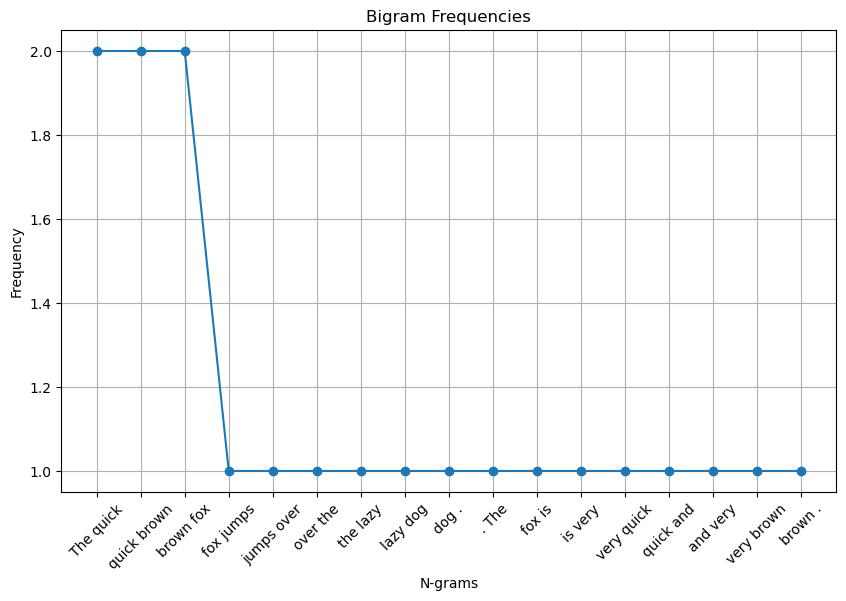

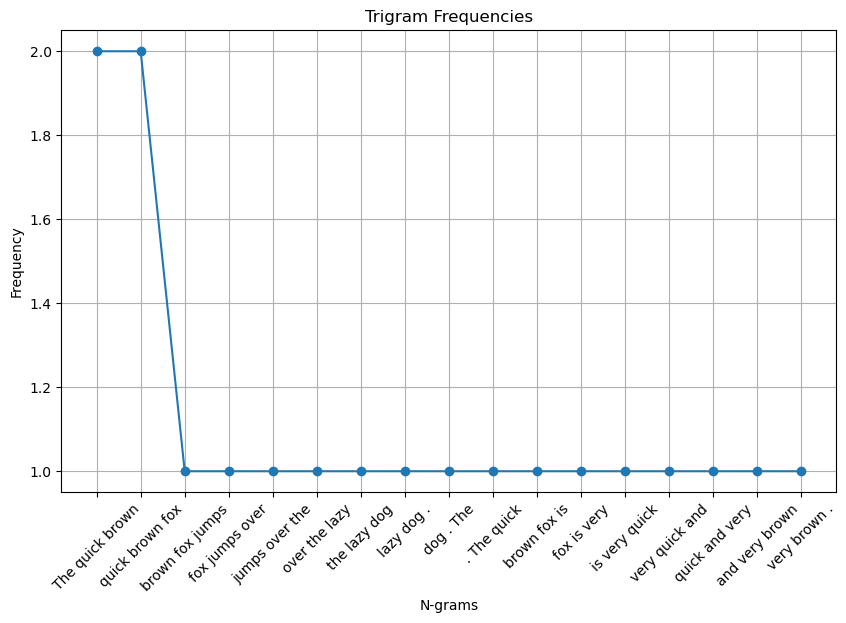

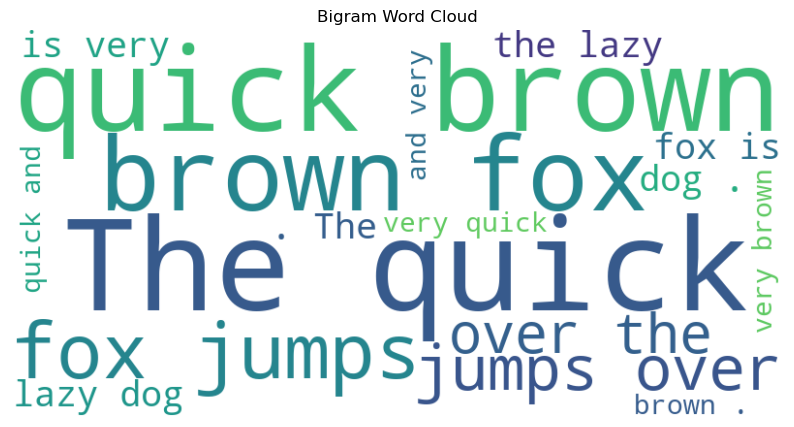

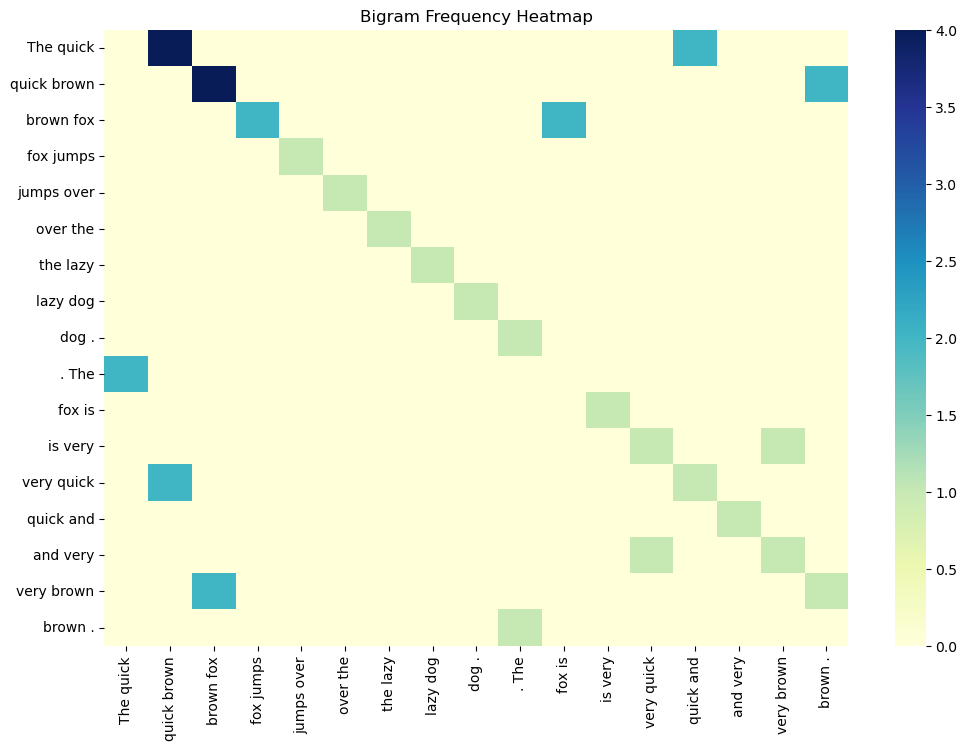

In [11]:
# N-gram Visualization

# Generate sample text for visualization
sample_text = "The quick brown fox jumps over the lazy dog. The quick brown fox is very quick and very brown."

# Generate bigrams and trigrams for visualization
bigrams = generate_word_ngrams(sample_text, 2)
trigrams = generate_word_ngrams(sample_text, 3)

# Calculate frequencies for bigrams and trigrams
bigram_freq = calculate_ngram_frequencies(bigrams)
trigram_freq = calculate_ngram_frequencies(trigrams)

# Plot bigram frequencies
plot_ngram_frequencies(bigram_freq, "Bigram Frequencies")

# Plot trigram frequencies
plot_ngram_frequencies(trigram_freq, "Trigram Frequencies")

# Create a word cloud for bigrams
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_freq)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Bigram Word Cloud")
plt.show()

# Create a heatmap for bigram frequencies
bigram_matrix = np.zeros((len(bigram_freq), len(bigram_freq)))
bigram_list = list(bigram_freq.keys())

for i, bigram1 in enumerate(bigram_list):
    for j, bigram2 in enumerate(bigram_list):
        if bigram1.split()[1] == bigram2.split()[0]:
            bigram_matrix[i, j] = bigram_freq[bigram1] * bigram_freq[bigram2]

plt.figure(figsize=(12, 8))
sns.heatmap(bigram_matrix, xticklabels=bigram_list, yticklabels=bigram_list, cmap="YlGnBu")
plt.title("Bigram Frequency Heatmap")
plt.show()